In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import requests
import time
import os
from joblib import Memory
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')
Base_Path = "/content/drive/MyDrive/capstone_project_fire_risk"

Mounted at /content/drive


In [4]:
uef_df= gpd.read_file(f"{Base_Path}/property_assessment_cleaned/property_assessment_cleaned.shp")

In [5]:
uef_df.head()

,FLOORS_ABO,USE_CODE,USE_DESCRI,BUILDING_A,USE_CAT,geometry
0,NaN,1921,Stationnement intérieur (condo),42,Other,"POLYGON ((297829.682 5039309.256, 297830.361 5..."
1,1.0,1000,Logement,13,Residential,"POLYGON ((279029.064 5041684.534, 279039.924 5..."
2,3.0,1000,Logement,42,Residential,"POLYGON ((298357.161 5040101.378, 298393.693 5..."
3,1.0,1000,Logement,62,Residential,"POLYGON ((299541.566 5040531.245, 299550.843 5..."
4,1.0,1000,Logement,111,Residential,"POLYGON ((298555.055 5039168.035, 298576.898 5..."


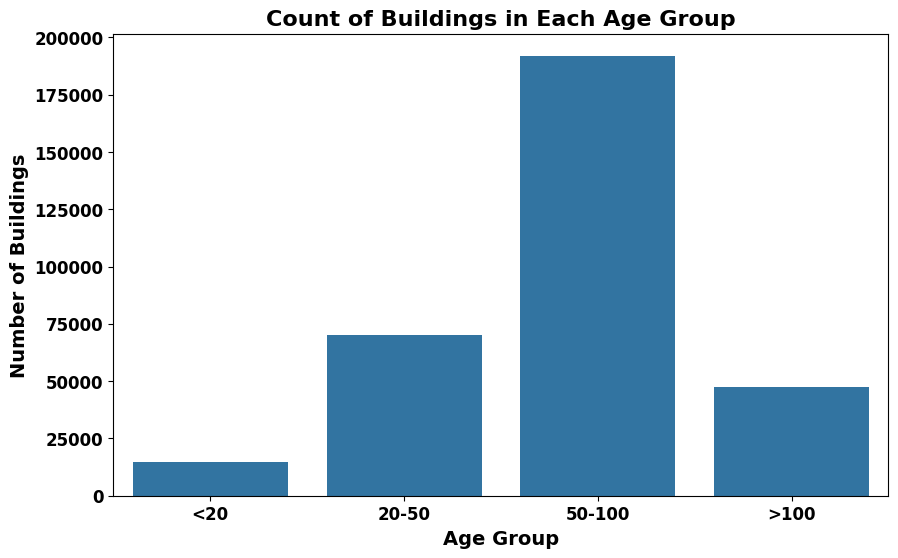

In [6]:
# Defining age group bins and plotting
age_bins = [0, 20, 50, 100, float('inf')]  # Define your bins
age_labels = ['<20', '20-50', '50-100', '>100']

uef_df['AgeGroup'] = pd.cut(uef_df['BUILDING_A'], bins=age_bins, labels=age_labels, right=False)

plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', data=uef_df)
plt.title('Count of Buildings in Each Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=14, fontweight='bold')
plt.ylabel('Number of Buildings', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.show()

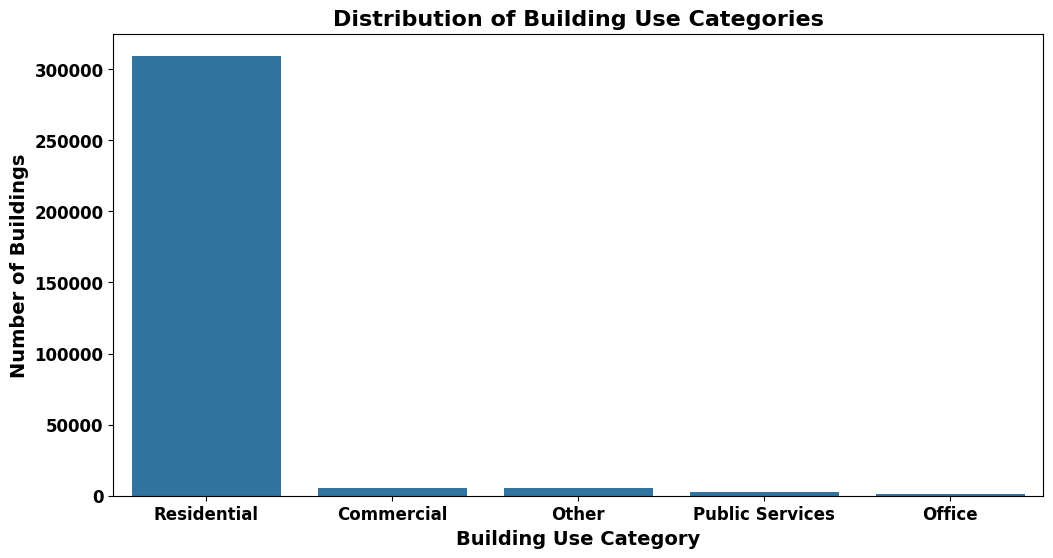

USE_CAT
Residential        309438
Commercial           5499
Other                5358
Public Services      2824
Office                980
Name: count, dtype: int64


In [19]:
# Analyze the distribution of building use category
plt.figure(figsize=(12, 6))
sns.countplot(x='USE_CAT', data=uef_df, order=uef_df['USE_CAT'].value_counts().index) # Order bars by frequency
plt.title('Distribution of Building Use Categories', fontsize=16, fontweight='bold')
plt.ylabel('Number of Buildings', fontsize=14, fontweight='bold')
plt.xlabel('Building Use Category', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.show()

print(uef_df['USE_CAT'].value_counts())


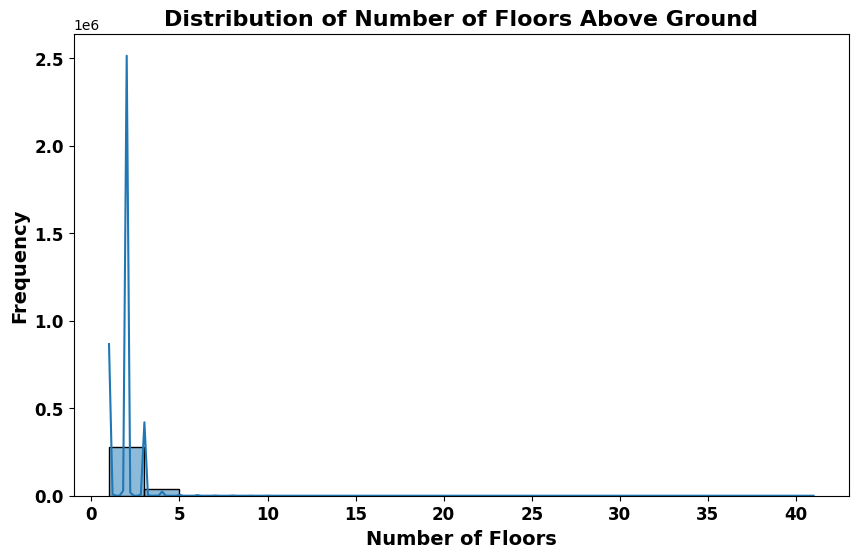

In [21]:
# Analyze the distribution of the number of floors above ground
plt.figure(figsize=(10, 6))
sns.histplot(uef_df['FLOORS_ABO'], kde=True)  # Use histplot for better visualization
plt.title('Distribution of Number of Floors Above Ground', fontsize=16, fontweight='bold')
plt.xlabel('Number of Floors', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.show()


In [20]:
uef_df['FLOORS_ABO'].describe()

,FLOORS_ABO
count,316841.000000
mean,1.929125
std,0.825782
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,41.000000


In [13]:
casernes = gpd.read_file(f"{Base_Path}/casernes/results.shp")

In [16]:
casernes = casernes.to_crs(epsg=3857)
# Ensure both GeoDataFrames have the same coordinate reference system (CRS)
uef_df = uef_df.to_crs(casernes.crs)
# Calculate distances to the nearest fire station
uef_df['distance_to_nearest_caserne'] = uef_df.geometry.apply(lambda g: casernes.distance(g).min())

   FLOORS_ABO  USE_CODE                       USE_DESCRI  BUILDING_A  \
0         NaN      1921  Stationnement intérieur (condo)          42   
1         1.0      1000                         Logement          13   
2         3.0      1000                         Logement          42   
3         1.0      1000                         Logement          62   
4         1.0      1000                         Logement         111   

       USE_CAT                                           geometry AgeGroup  \
0        Other  POLYGON ((-8191910.185 5699577.712, -8191909.2...    20-50   
1  Residential  POLYGON ((-8218700.942 5702902.467, -8218685.3...      <20   
2  Residential  POLYGON ((-8191160.072 5700710.518, -8191108.0...    20-50   
3  Residential  POLYGON ((-8189473.461 5701326.468, -8189460.2...   50-100   
4  Residential  POLYGON ((-8190876.86 5699377.002, -8190845.72...     >100   

   distance_to_nearest_caserne  
0                   821.692487  
1                  2652.118228  

In [17]:
uef_df.head()

,FLOORS_ABO,USE_CODE,USE_DESCRI,BUILDING_A,USE_CAT,geometry,AgeGroup,distance_to_nearest_caserne
0,NaN,1921,Stationnement intérieur (condo),42,Other,"POLYGON ((-8191910.185 5699577.712, -8191909.2...",20-50,821.692487
1,1.0,1000,Logement,13,Residential,"POLYGON ((-8218700.942 5702902.467, -8218685.3...",<20,2652.118228
2,3.0,1000,Logement,42,Residential,"POLYGON ((-8191160.072 5700710.518, -8191108.0...",20-50,997.357205
3,1.0,1000,Logement,62,Residential,"POLYGON ((-8189473.461 5701326.468, -8189460.2...",50-100,810.698725
4,1.0,1000,Logement,111,Residential,"POLYGON ((-8190876.86 5699377.002, -8190845.72...",>100,343.983701


<Axes: >

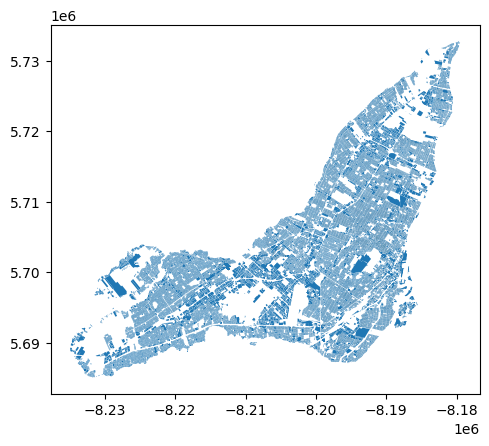

In [22]:
uef_df.plot()